# Load Package and Data

In [1]:
import datetime as dt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("Credit card transactions - India - Simple.csv")

In [3]:
df.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


# Basic Data Understanding Proccess

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [6]:
cols= df.columns
for col in cols:
    print(f'{col}, has {df[col].nunique()} unique values.' )

index, has 26052 unique values.
City, has 986 unique values.
Date, has 600 unique values.
Card Type, has 4 unique values.
Exp Type, has 6 unique values.
Gender, has 2 unique values.
Amount, has 24972 unique values.


# Data Wrangling and Feature Engineering 

In [7]:
df[['Day','Month','Year']] =df['Date'].str.split("-", expand=True)
df

,index,City,Date,Card Type,Exp Type,Gender,Amount,Day,Month,Year
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,29,Oct,14
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,22,Aug,14
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,27,Aug,14
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,12,Apr,14
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574,5,May,15
...,...,...,...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191,22,Jun,14
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316,3,Aug,14
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019,16,Jan,15
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174,14,Sep,14


In [8]:
df[['City', 'Country']]=df['City'].str.split(", ", expand=True)
df

,index,City,Date,Card Type,Exp Type,Gender,Amount,Day,Month,Year,Country
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475,29,Oct,14,India
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555,22,Aug,14,India
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738,27,Aug,14,India
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424,12,Apr,14,India
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574,5,May,15,India
...,...,...,...,...,...,...,...,...,...,...,...
26047,26047,Kolkata,22-Jun-14,Silver,Travel,F,128191,22,Jun,14,India
26048,26048,Pune,3-Aug-14,Signature,Travel,M,246316,3,Aug,14,India
26049,26049,Hyderabad,16-Jan-15,Silver,Travel,M,265019,16,Jan,15,India
26050,26050,Kanpur,14-Sep-14,Silver,Travel,M,88174,14,Sep,14,India


In [9]:
# Make Function to interpret spending amount size by 25%, 50%, 75%, and > 75%
def dealsize(amount):
    if amount <= 77120:
        amt ='Small'
    elif 77120 <amount <= 153106:
        amt= 'Medium'
    elif 153106 <amount <= 228050:
         amt= 'Large'
    else:
        amt ='Extra Large'
    return amt

In [10]:
# Apply function and Create new column by amount
df['Deal Size'] = df['Amount'].apply(dealsize)

In [11]:
# Arrange year format with 20XX
def year(yr):
    yr2 = "20"+ yr
    return yr2

df['Year']= df['Year'].apply(year)

df['Year'].sample(10)

18508    2013
13760    2014
4539     2014
24338    2013
1820     2014
945      2014
3757     2014
10845    2014
21902    2014
3129     2015
Name: Year, dtype: object

In [12]:
# Recheck unique values in each column
cols= df.columns
for col in cols:
    print(f'{col}, has {df[col].nunique()} unique values.' )

index, has 26052 unique values.
City, has 986 unique values.
Date, has 600 unique values.
Card Type, has 4 unique values.
Exp Type, has 6 unique values.
Gender, has 2 unique values.
Amount, has 24972 unique values.
Day, has 31 unique values.
Month, has 12 unique values.
Year, has 3 unique values.
Country, has 1 unique values.
Deal Size, has 4 unique values.


# EDA 

# Catgeory counts and their Proportions

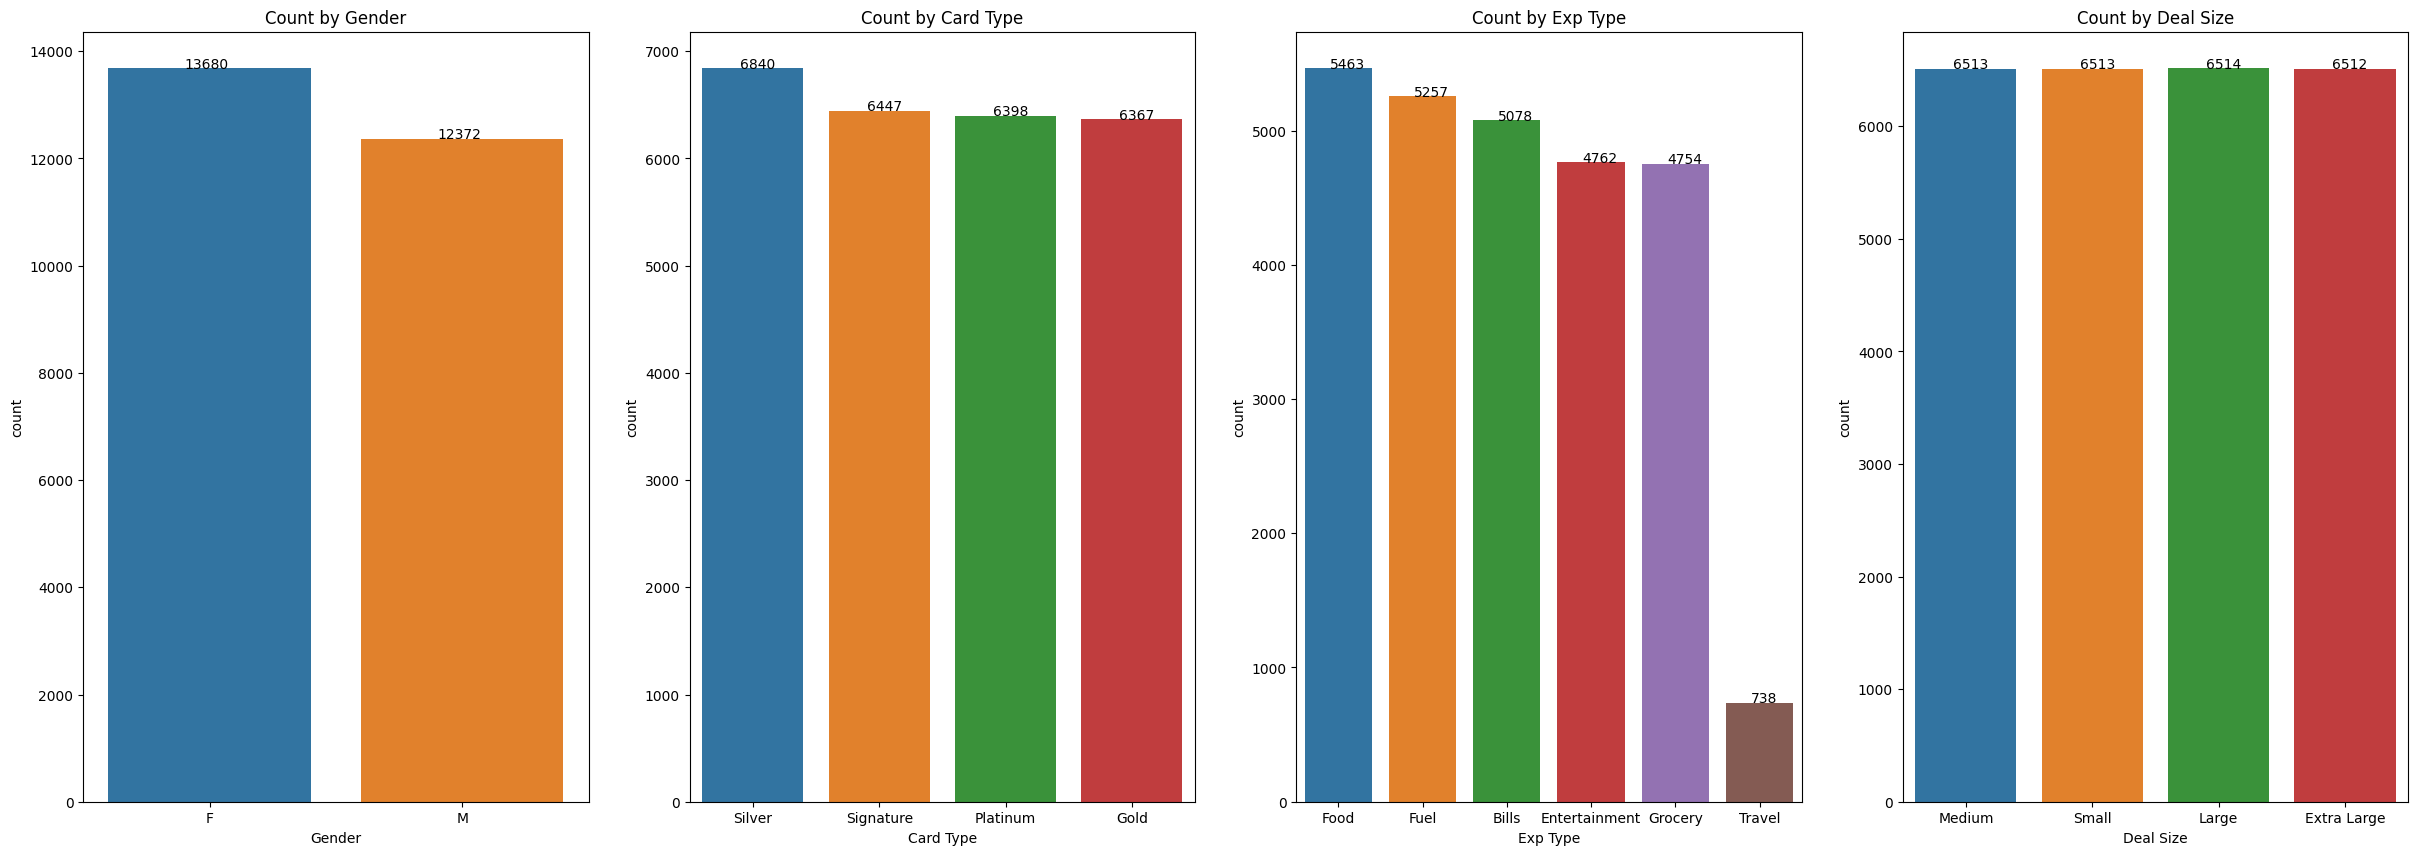

In [13]:
fig,(ax1, ax2, ax3, ax4)=plt.subplots(nrows=1,ncols=4, figsize=(30,10))


fig1= sns.countplot(data=df, x='Gender', ax= ax1)
fig1.set_title('Count by Gender')

fig2=sns.countplot(data=df, x='Card Type', order= df['Card Type'].value_counts().index, ax= ax2)
fig2.set_title('Count by Card Type')

fig3=sns.countplot(data=df, x='Exp Type', order= df['Exp Type'].value_counts().index, ax= ax3)
fig3.set_title('Count by Exp Type')

fig4=sns.countplot(data=df, x='Deal Size', ax= ax4)
fig4.set_title('Count by Deal Size')

for p in fig1.patches:
   fig1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

for p in fig2.patches:
   fig2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

for p in fig3.patches:
   fig3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

for p in fig4.patches:
   fig4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30
                                                 , p.get_height()+0.10))

In [14]:
# Use a for loop to plot all descriptive proportions
Descriptive_category=['Gender', 'Card Type', 'Exp Type', 'Deal Size']

for x in Descriptive_category:
    dfx=df[x].value_counts().reset_index()
    fig =px.pie(dfx, values='count', names=x, title=f'Percentage of each {x}')
    fig.show()



# Observations 1:
>1. In the data, female users is 5% higher than male users.
>2. The most common spending type is food->fuel->bills->entertainment->grocery and the least is travel
>3. Silver is the most popular card type, slightly higher (1.5%) than  3 other card types
>4. Deal size is segmented into 4 equal sizes, meets our expectation because it's defined by the amount dispersion, I'm interested in the gender and spending type wthin 4 deal sizes

# Credit card using habit by Gender

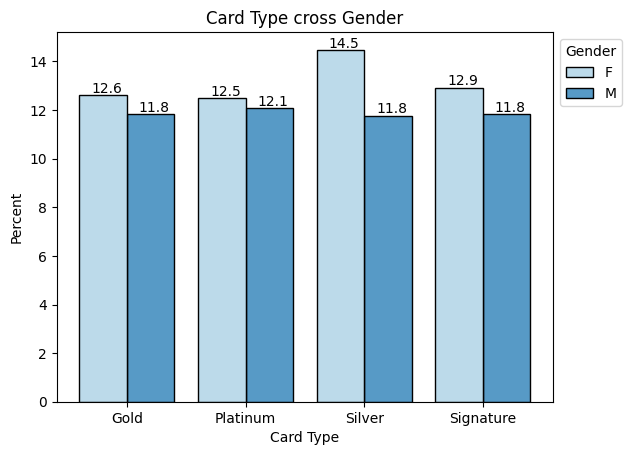

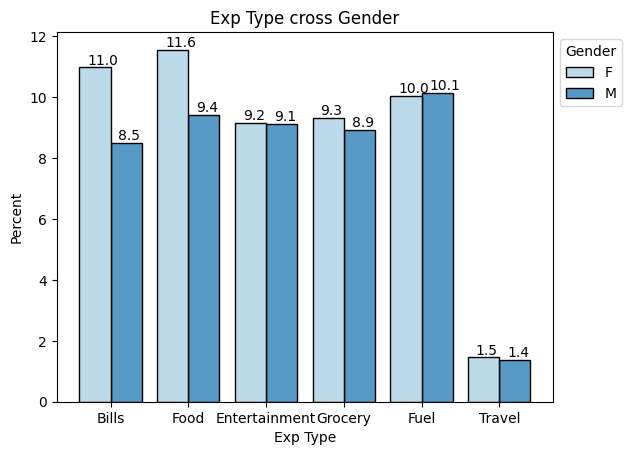

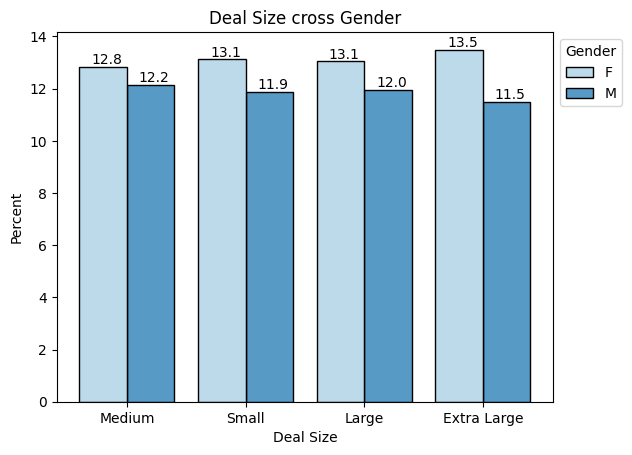

In [15]:
Descriptive_category2=['Card Type', 'Exp Type', 'Deal Size']
for n in Descriptive_category2:
    ax=sns.histplot(data=df, x=n, hue='Gender', palette='Paired', stat='percent', multiple='dodge', shrink=0.8) 
    plt.title(f'{n} cross Gender')
    for p in ax.patches:
       ax.annotate('{:.01f}'.format(p.get_height()), (p.get_x()+0.10
                                                 , p.get_height()+0.10))
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Observations 2:
>1. In most of the label, Female users has higher percentage than male users.
>2. While comparing expense type, fuel is the only label male users use credit card more than female, while food and bills female surpass male
>3. When the deal size gets bigger, the range of (female-male) percentage gets larger, which means higher the amount is, more female tend to use credit card and males tend to pay by other methods.

# Spending Habit by Card type

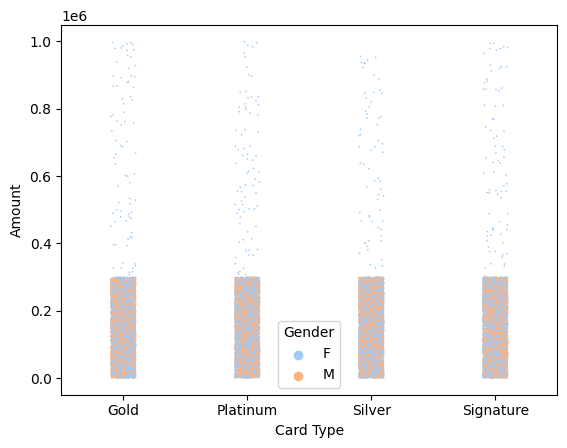

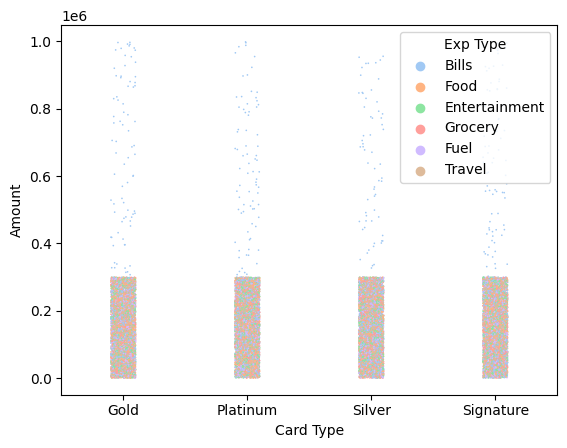

In [16]:
Descriptive_category3=['Gender', 'Exp Type']
for m in Descriptive_category3:
    sns.stripplot(data=df, x= 'Card Type', hue=m, y='Amount', alpha=1, palette='pastel', size=1.2 )
    plt.show()

# Observations 3:
>1. Interesting finding is no matter which card type, the interaction with other labels looks indentical.
>2. As far as gender, 4 card types  male users spend around 0.3M
>3. As far as expense type, Bills stand out of other expense, while other expenses locate lower than 0.4M.

# Yearly Spending Trend

In [17]:
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount',
       'Day', 'Month', 'Year', 'Country', 'Deal Size'],
      dtype='object')

In [18]:
df['Month'].unique()

array(['Oct', 'Aug', 'Apr', 'May', 'Sep', 'Feb', 'Jun', 'Mar', 'Dec',
       'Nov', 'Jul', 'Jan'], dtype=object)

In [19]:
df.loc[df['Month']=='Jan', 'Month_no']= 1
df.loc[df['Month']=='Feb', 'Month_no']= 2
df.loc[df['Month']=='Mar', 'Month_no']= 3
df.loc[df['Month']=='Apr', 'Month_no']= 4
df.loc[df['Month']=='May', 'Month_no']= 5
df.loc[df['Month']=='Jun', 'Month_no']= 6
df.loc[df['Month']=='Jul', 'Month_no']= 7
df.loc[df['Month']=='Aug', 'Month_no']= 8
df.loc[df['Month']=='Sep', 'Month_no']= 9
df.loc[df['Month']=='Oct', 'Month_no']= 10
df.loc[df['Month']=='Nov', 'Month_no']= 11
df.loc[df['Month']=='Dec', 'Month_no']= 12

df['Month_no'].astype('int64')
#'Jan'< 'Feb'< 'Mar'<'Apr'<'May'<'Jun'< 'Jul'<'Aug'<'Sep'<'Oct'< 'Nov'<'Dec'


0        10
1         8
2         8
3         4
4         5
         ..
26047     6
26048     8
26049     1
26050     9
26051    10
Name: Month_no, Length: 26052, dtype: int64

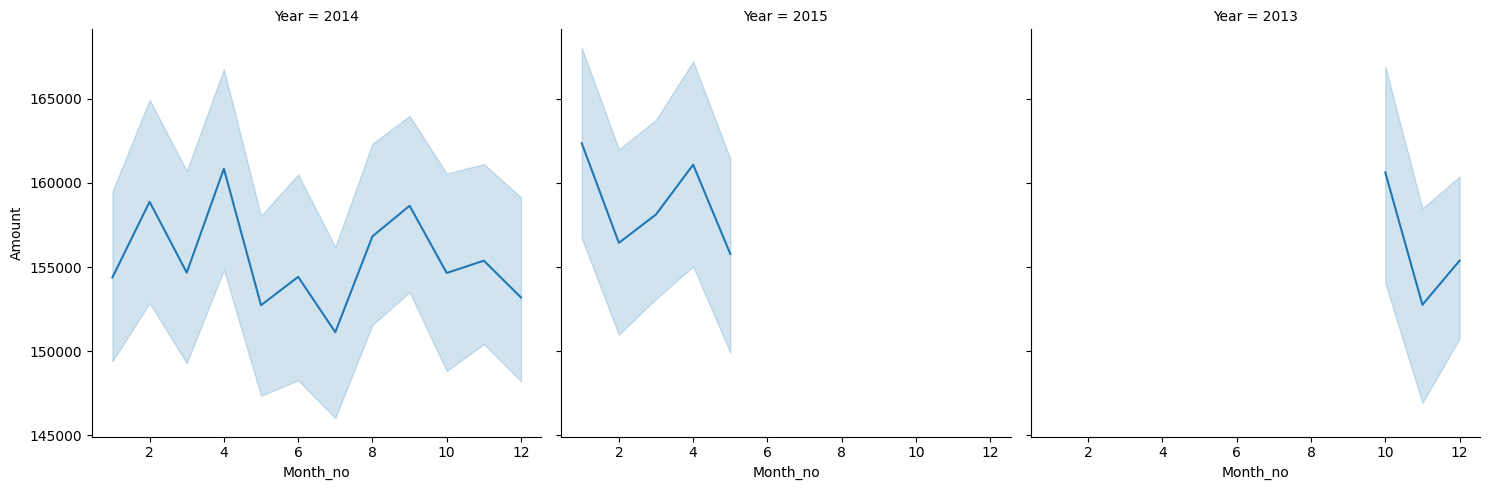

In [20]:
# Plot the monthly spenidng amount seperately 
sns.relplot(data=df, x='Month_no', y='Amount', col='Year', kind="line")

<Axes: xlabel='Month_no', ylabel='Amount'>

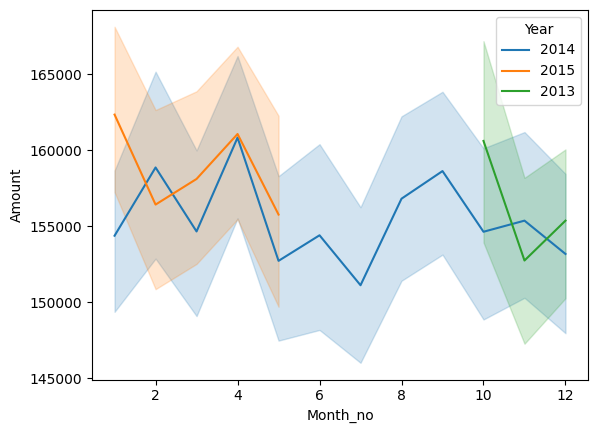

In [21]:
# Compare 3 years monthly spenidng amount in a plot
sns.lineplot(data=df, x='Month_no', y='Amount', hue='Year')

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['YYYY-MM']=df['Date'].dt.to_period("M")
df2=df.groupby(['City', 'YYYY-MM']).sum(['Amount']).reset_index().sort_values(by='Amount', ascending=False)
df2


,City,YYYY-MM,index,Amount,Month_no
54,Ahmedabad,2014-08,1400813,36734839,1640.0
392,Bengaluru,2014-11,1451320,35036934,2244.0
710,Delhi,2015-01,1458655,34187325,202.0
57,Ahmedabad,2014-11,1370400,32596234,2189.0
384,Bengaluru,2014-03,1257627,32416055,597.0
...,...,...,...,...,...
5033,Uravakonda,2013-12,16382,1289,12.0
278,Bahraich,2014-12,16895,1243,12.0
2531,Nasirabad,2013-10,15955,1207,10.0
403,Bhabua,2014-08,19289,1123,8.0


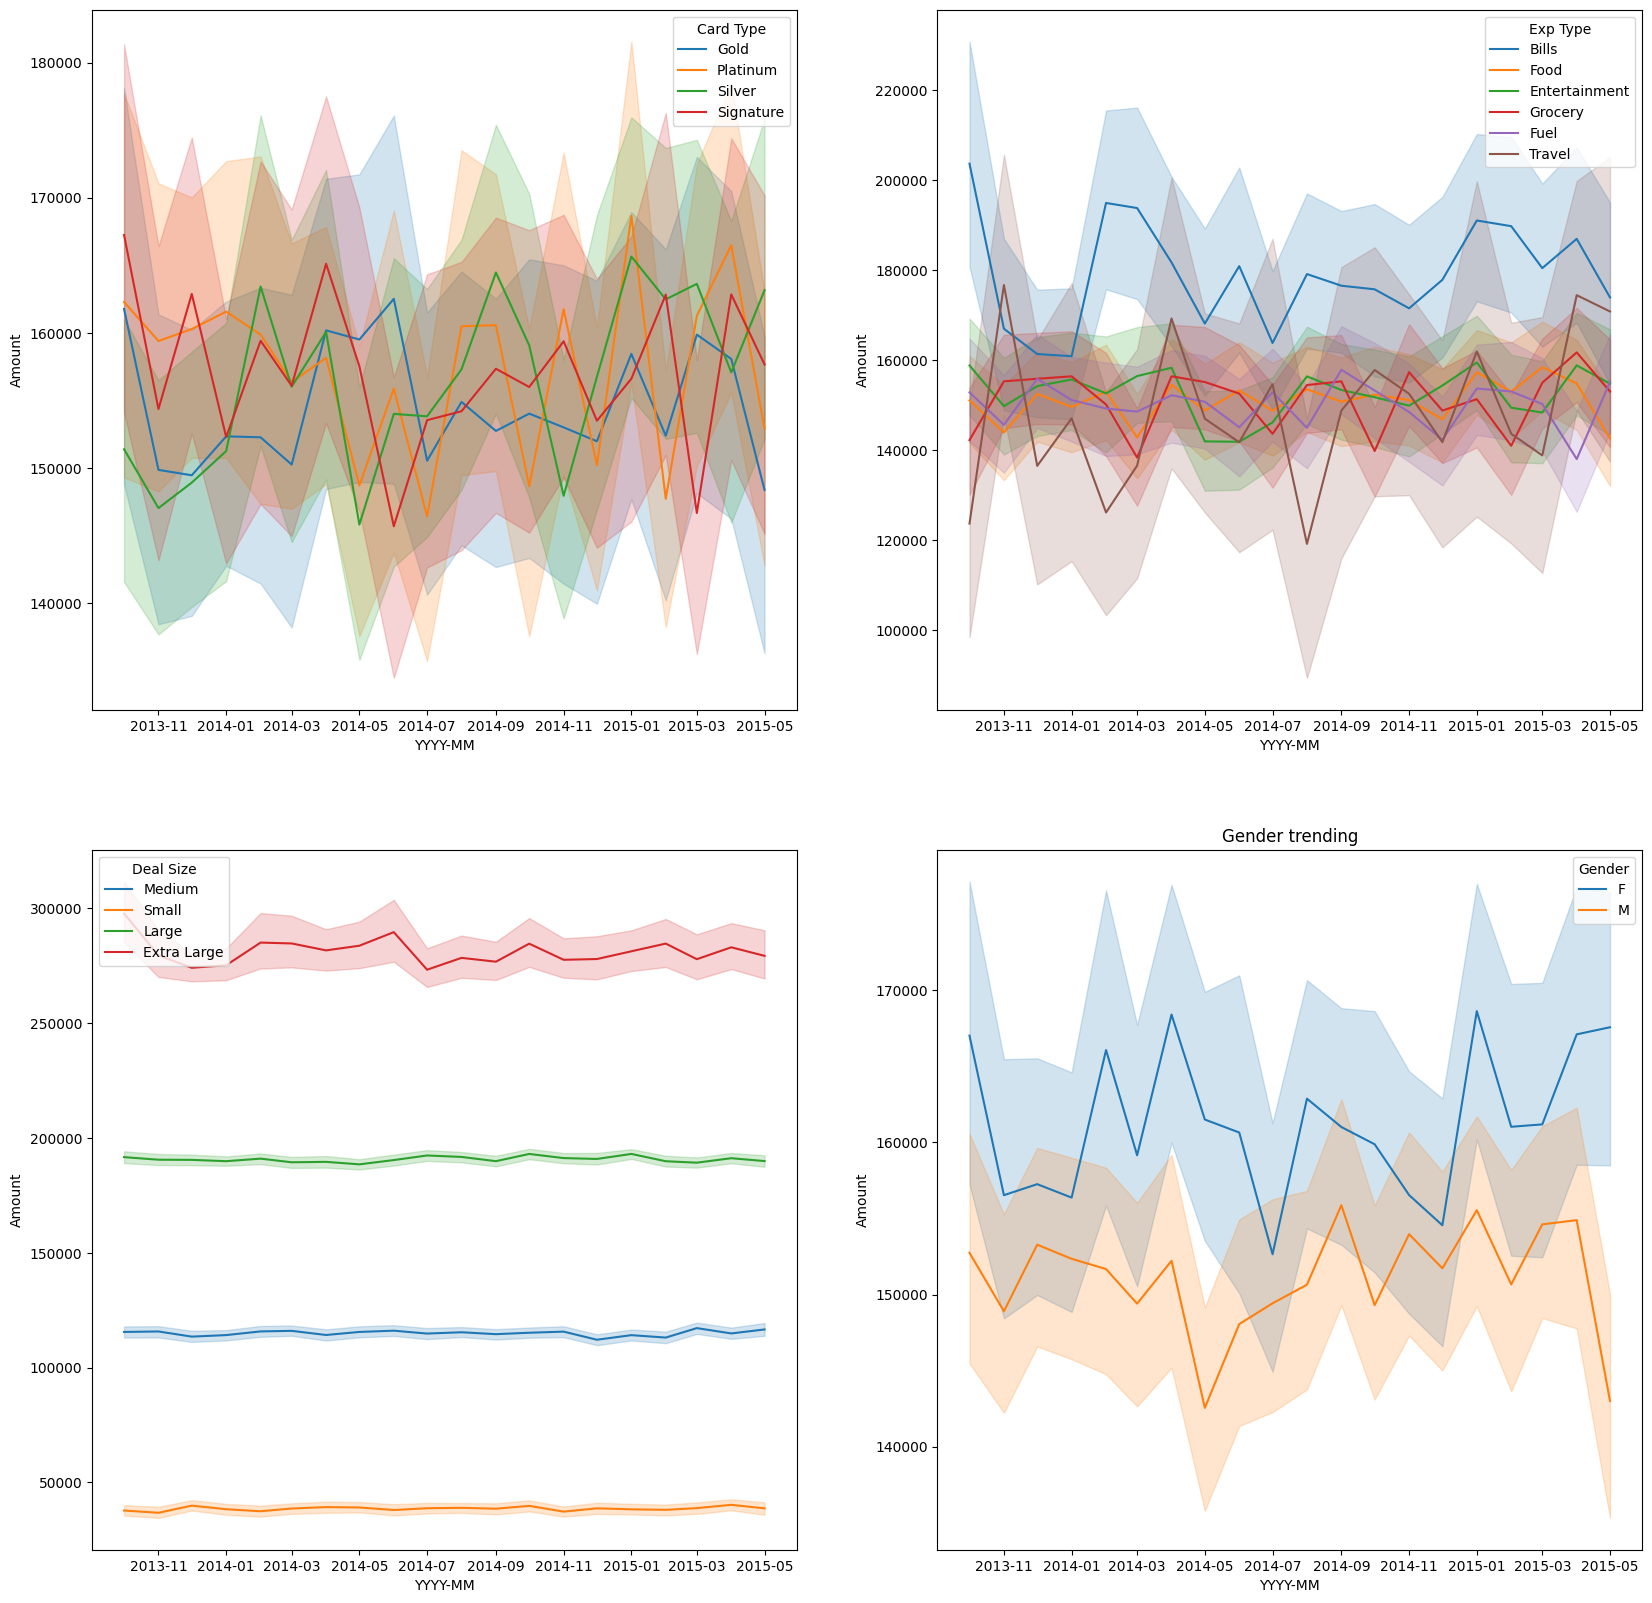

In [23]:
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig1=sns.lineplot(data=df, x=df['YYYY-MM'].dt.to_timestamp(), y='Amount', hue='Card Type', ax=ax1)
plt.title('Card type trending')

fig2=sns.lineplot(data=df, x=df['YYYY-MM'].dt.to_timestamp(), y='Amount', hue='Exp Type', ax=ax2)
plt.title('Expense Type trending')

fig3=sns.lineplot(data=df, x=df['YYYY-MM'].dt.to_timestamp(), y='Amount', hue='Deal Size', ax=ax3)
plt.title('Deal Size trending')

fig4=sns.lineplot(data=df, x=df['YYYY-MM'].dt.to_timestamp(), y='Amount', hue='Gender', ax=ax4)
plt.title('Gender trending')

plt.show()

# Top 50 Spending Spots

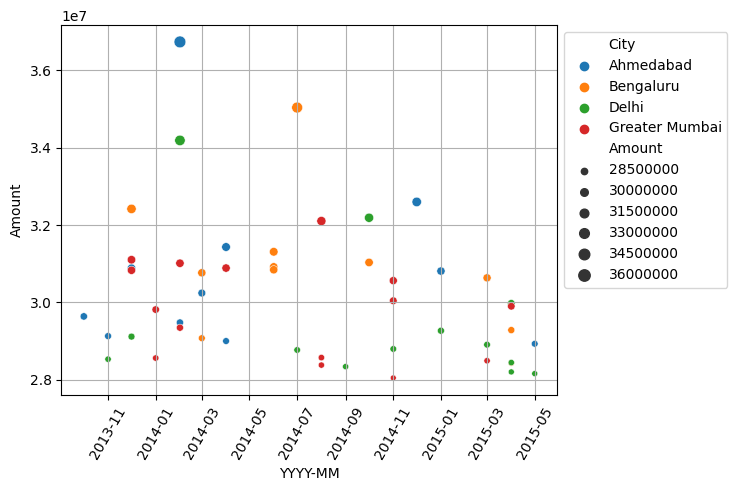

In [24]:
plt.grid()
ax=sns.scatterplot(data=df2.head(50), x=df['YYYY-MM'].dt.to_timestamp(), y='Amount', hue='City', size='Amount')
plt.xticks(rotation =60)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Top 10 Money Spent

In [25]:
df3= df.groupby(['City', 'Exp Type']).sum(['Amount']).sort_values(by='Amount', ascending=False).reset_index().head(10)
df3=df3.drop(['index', 'Month_no'], axis=1)
df3

,City,Exp Type,Amount
0,Greater Mumbai,Bills,153565576
1,Bengaluru,Bills,141499422
2,Ahmedabad,Bills,141289703
3,Delhi,Bills,140250013
4,Bengaluru,Food,123803420
5,Delhi,Food,120130834
6,Bengaluru,Fuel,118066371
7,Ahmedabad,Food,117466659
8,Ahmedabad,Fuel,116499993
9,Greater Mumbai,Fuel,116234363


# Buying Power of Top 10 City

In [26]:
df4=df.groupby(['City']).sum(['Amount']).sort_values(by='Amount', ascending=False).reset_index().head(10)
df4=df4.drop(['index', 'Month_no'], axis=1)
df4['percent_of_all']= (df4['Amount']/(df['Amount'].sum()))*100
df4

,City,Amount,percent_of_all
0,Greater Mumbai,576751476,14.153989
1,Bengaluru,572326739,14.045402
2,Ahmedabad,567794310,13.934172
3,Delhi,556929212,13.667533
4,Kolkata,115466943,2.833660
5,Lucknow,115334476,2.830410
6,Chennai,114730600,2.815590
7,Hyderabad,114493477,2.809771
8,Surat,114486151,2.809591
9,Kanpur,114370532,2.806754


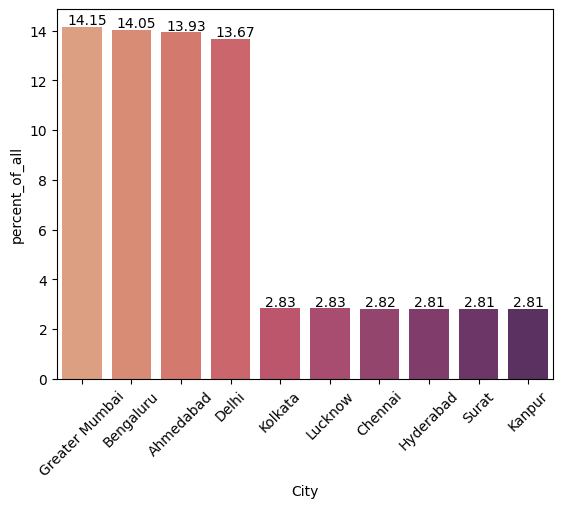

In [27]:
ax =sns.barplot(data=df4, x='City', y='percent_of_all', palette='flare')
for p in ax.patches:
       ax.annotate('{:.02f}'.format(p.get_height()), (p.get_x()+0.10
                                                 , p.get_height()+0.10))
plt.xticks(rotation=45)
plt.show()

# Expense type for largest deal size

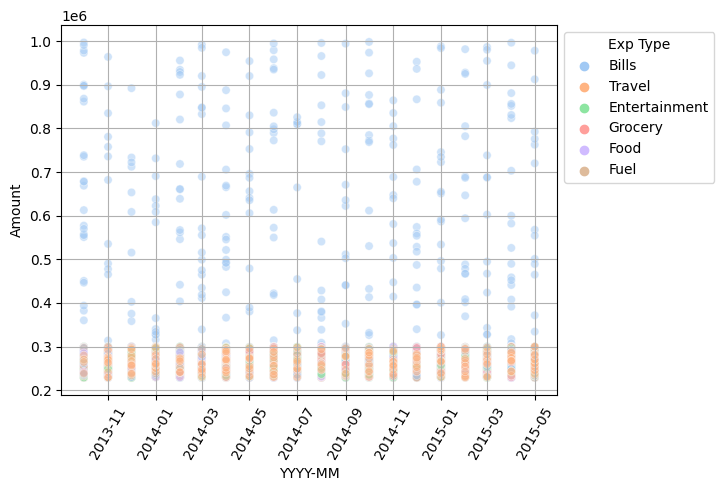

In [28]:
plt.grid()
hueorder=['Bills', 'Travel', 'Entertainment', 'Grocery', 'Food',  'Fuel']
ax=sns.scatterplot(data=df[df['Deal Size']=='Extra Large'], x=df['YYYY-MM'].dt.to_timestamp(), y='Amount', hue='Exp Type', hue_order=hueorder, palette='pastel', alpha=0.5)
plt.xticks(rotation =60)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Common Spending Range Among Card Type

<Figure size 500x400 with 0 Axes>

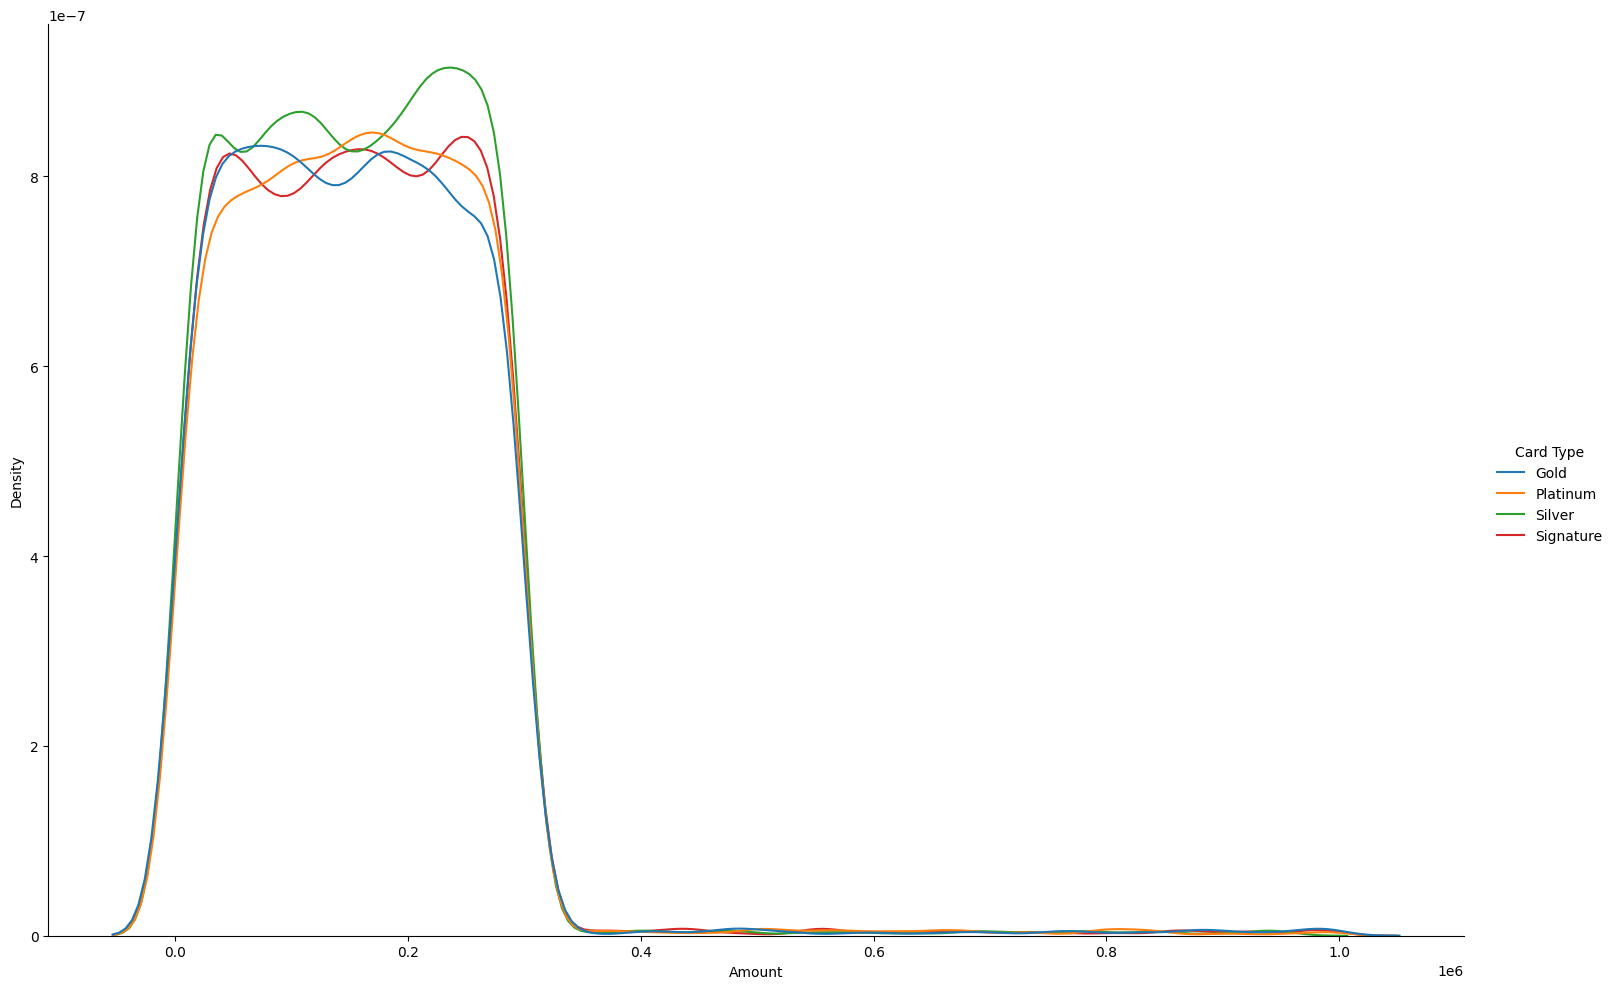

In [29]:
plt.figure(figsize=(5, 4))
sns.displot(data=df, x='Amount', hue='Card Type', kind='kde',height= 10, aspect= 1.5)


# Observations 4:
>1. Data collects information from 2013/10-2015/05
>2. The most spent expense is bill, though travel expense doesn't frequently appear, it's spenidng amount is high
>3. 4 cities spending amount has exceeded 50% of whole country
>5. Female overall spend more than men throughout the time
>6. Different cardtypes have different distribution of spending amount